In [ ]:
pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=fc138f61a3192b8ffd05c1dd6c6218b0d3b5d6f87765a7870cb79b259c41af72
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succe

Exploratory data analysis

In [ ]:
pip install opencage

In [9]:
import pandas as pd
#from googletrans import Translator
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn. preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


In [ ]:
# Load the Excel file
data = pd.read_excel("/content/PEFR Dataset.xlsx")


In [ ]:
data.head()

,ID,BCODE,UID1,UID2,Age,Sex,Smoke,Smoke_amount,Height,Weight,BMI,BSA,occupation,address
0,SB-001,14631875,BC4386476,NaN,43,M,NS,0,156,76,31.229454,1.814754,주부,경기도 시흥시 마유로 443번길 1
1,SB-002,14010074,BC3298156,NaN,66,M,NS,0,163,58,21.829952,1.620528,제조업,경기 부천시 원미구 중동 무지개마을 1201-1602
2,SB-003,14221420,BC4165314,NaN,61,M,ES,20,173,67,22.386314,1.794358,타일,인천시 부평구 수변로 333
3,SB-004,14010592,BC4201070,NaN,49,M,NS,0,142,51,25.292601,1.418332,주부,인천 서구 연희동 799-14
4,SB-005,14010759,BC4212692,NaN,53,M,NS,0,156,70,28.763971,1.741647,무응답,경기 부천시 원미구 상3동 라일락마을 2333-1503


In [ ]:
data.columns

Index(['ID', 'BCODE', 'UID1', 'UID2', 'Age', 'Sex', 'Smoke', 'Smoke_amount',
       'Height', 'Weight', 'BMI', 'BSA', 'occupation', 'address'],
      dtype='object')

In [ ]:
translator= Translator()

In [ ]:
data['address_english'] = data['address'].apply(lambda x: translator.translate(x, src='ko', dest='en').text)

In [ ]:
data['occupation_english'] = data['occupation'].apply(lambda x: translator.translate(x, src='ko', dest='en').text)

In [ ]:
data.head()

,ID,BCODE,UID1,UID2,Age,Sex,Smoke,Smoke_amount,Height,Weight,BMI,BSA,occupation,address,address_english,occupation_english
0,SB-001,14631875,BC4386476,NaN,43,M,NS,0,156,76,31.229454,1.814754,주부,경기도 시흥시 마유로 443번길 1,"1 Mayu -ro 443beon -gil, Siheung -si, Gyeonggi...",housewife
1,SB-002,14010074,BC3298156,NaN,66,M,NS,0,163,58,21.829952,1.620528,제조업,경기 부천시 원미구 중동 무지개마을 1201-1602,"1201-1602, Rainbow Village in Middle East, Won...",Manufacturing industry
2,SB-003,14221420,BC4165314,NaN,61,M,ES,20,173,67,22.386314,1.794358,타일,인천시 부평구 수변로 333,"333, Bupyeong -gu, Incheon",tile
3,SB-004,14010592,BC4201070,NaN,49,M,NS,0,142,51,25.292601,1.418332,주부,인천 서구 연희동 799-14,"799-14, Yeonhui-dong, Seo-gu, Incheon",housewife
4,SB-005,14010759,BC4212692,NaN,53,M,NS,0,156,70,28.763971,1.741647,무응답,경기 부천시 원미구 상3동 라일락마을 2333-1503,"2333-1503, Sang3-dong, Wonmi-gu, Bucheon-si, G...",No response


In [ ]:
data.columns

Index(['ID', 'BCODE', 'UID1', 'UID2', 'Age', 'Sex', 'Smoke', 'Smoke_amount',
       'Height', 'Weight', 'BMI', 'BSA', 'occupation', 'address',
       'address_english', 'occupation_english'],
      dtype='object')

In [ ]:
columns = list(data.columns)


# Remove 'occupation_english' from its current position
columns.remove('occupation_english')

# Find the index of 'occupation' and insert 'occupation_english' next to it
occupation_index = columns.index('occupation')
columns.insert(occupation_index + 1, 'occupation_english')

# Reorder the DataFrame using the new column order
data = data[columns]

In [ ]:
# Display the updated DataFrame
data.head()

,ID,BCODE,UID1,UID2,Age,Sex,Smoke,Smoke_amount,Height,Weight,BMI,BSA,occupation,occupation_english,address,address_english
0,SB-001,14631875,BC4386476,NaN,43,M,NS,0,156,76,31.229454,1.814754,주부,housewife,경기도 시흥시 마유로 443번길 1,"1 Mayu -ro 443beon -gil, Siheung -si, Gyeonggi..."
1,SB-002,14010074,BC3298156,NaN,66,M,NS,0,163,58,21.829952,1.620528,제조업,Manufacturing industry,경기 부천시 원미구 중동 무지개마을 1201-1602,"1201-1602, Rainbow Village in Middle East, Won..."
2,SB-003,14221420,BC4165314,NaN,61,M,ES,20,173,67,22.386314,1.794358,타일,tile,인천시 부평구 수변로 333,"333, Bupyeong -gu, Incheon"
3,SB-004,14010592,BC4201070,NaN,49,M,NS,0,142,51,25.292601,1.418332,주부,housewife,인천 서구 연희동 799-14,"799-14, Yeonhui-dong, Seo-gu, Incheon"
4,SB-005,14010759,BC4212692,NaN,53,M,NS,0,156,70,28.763971,1.741647,무응답,No response,경기 부천시 원미구 상3동 라일락마을 2333-1503,"2333-1503, Sang3-dong, Wonmi-gu, Bucheon-si, G..."


In [ ]:
data.tail()

,ID,BCODE,UID1,UID2,Age,Sex,Smoke,Smoke_amount,Height,Weight,BMI,BSA,occupation,occupation_english,address,address_english
109,SB-135,14000819,BC3296833,NaN,79,M,NS,0,163,67,25.217359,1.741726,무직,inoccupation,부천시 원미구 도당동 137-4,"137-4, Dodang-dong, Wonmi-gu, Bucheon-si"
110,SB-137,14000774,BC3300701,NaN,76,F,NS,0,160,66,25.781250,1.712698,주부,housewife,경기도 부천시 부흥로 71,"71, revival -ro, Bucheon -si, Gyeonggi -do"
111,SB-139,14000670,BC3334855,NaN,50,F,ES,20,162,64,24.386526,1.697056,건설업,Construction industry,부천시 원미구 중2동 그린타운 한신A,Hanshin A
112,SB-140,14000334,BC3309595,NaN,69,F,ES,15,170,72,24.913495,1.843909,건설업,Construction industry,부천시 원미구 중3동 중흥마을,"Jungheung Village, 3 -dong, Wonmi -gu, Bucheon..."
113,SB-141,14000223,BC3294749,NaN,71,F,NS,0,162,73,27.815882,1.812457,기타,etc,부천시 오정구 여월동 8-54,"8-54 Yeowol-dong, Ojeong-gu, Bucheon-si"


In [ ]:
data.dtypes

,0
ID,object
BCODE,object
UID1,object
UID2,object
Age,int64
Sex,object
Smoke,object
Smoke_amount,int64
Height,int64
Weight,int64


In [ ]:
data.describe()

,Age,Smoke_amount,Height,Weight,BMI,BSA
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,64.385965,4.421053,161.157895,61.456140,23.618534,1.655250
std,12.636868,10.222217,7.995108,9.355459,2.886096,0.155292
min,30.000000,0.000000,142.000000,40.000000,16.866251,1.299573
25%,57.000000,0.000000,156.000000,54.000000,21.734046,1.535278
50%,65.000000,0.000000,161.500000,61.000000,23.624884,1.647388
75%,72.000000,0.750000,166.000000,68.000000,25.276806,1.777755
max,90.000000,60.000000,187.000000,83.000000,32.830980,1.990812


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  114 non-null    object 
 1   BCODE               114 non-null    object 
 2   UID1                114 non-null    object 
 3   UID2                5 non-null      object 
 4   Age                 114 non-null    int64  
 5   Sex                 114 non-null    object 
 6   Smoke               114 non-null    object 
 7   Smoke_amount        114 non-null    int64  
 8   Height              114 non-null    int64  
 9   Weight              114 non-null    int64  
 10  BMI                 114 non-null    float64
 11  BSA                 114 non-null    float64
 12  occupation          114 non-null    object 
 13  occupation_english  114 non-null    object 
 14  address             114 non-null    object 
 15  address_english     114 non-null    object 
dtypes: float

In [ ]:
data.isnull().sum()

,0
ID,0
BCODE,0
UID1,0
UID2,109
Age,0
Sex,0
Smoke,0
Smoke_amount,0
Height,0
Weight,0


In [ ]:
data = data.drop("UID2", axis=1)

In [ ]:
data



,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,BMI,BSA,occupation,occupation_english,address,address_english
0,SB-001,14631875,BC4386476,43,M,NS,0,156,76,31.229454,1.814754,주부,housewife,경기도 시흥시 마유로 443번길 1,"1 Mayu -ro 443beon -gil, Siheung -si, Gyeonggi..."
1,SB-002,14010074,BC3298156,66,M,NS,0,163,58,21.829952,1.620528,제조업,Manufacturing industry,경기 부천시 원미구 중동 무지개마을 1201-1602,"1201-1602, Rainbow Village in Middle East, Won..."
2,SB-003,14221420,BC4165314,61,M,ES,20,173,67,22.386314,1.794358,타일,tile,인천시 부평구 수변로 333,"333, Bupyeong -gu, Incheon"
3,SB-004,14010592,BC4201070,49,M,NS,0,142,51,25.292601,1.418332,주부,housewife,인천 서구 연희동 799-14,"799-14, Yeonhui-dong, Seo-gu, Incheon"
4,SB-005,14010759,BC4212692,53,M,NS,0,156,70,28.763971,1.741647,무응답,No response,경기 부천시 원미구 상3동 라일락마을 2333-1503,"2333-1503, Sang3-dong, Wonmi-gu, Bucheon-si, G..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,SB-135,14000819,BC3296833,79,M,NS,0,163,67,25.217359,1.741726,무직,inoccupation,부천시 원미구 도당동 137-4,"137-4, Dodang-dong, Wonmi-gu, Bucheon-si"
110,SB-137,14000774,BC3300701,76,F,NS,0,160,66,25.781250,1.712698,주부,housewife,경기도 부천시 부흥로 71,"71, revival -ro, Bucheon -si, Gyeonggi -do"
111,SB-139,14000670,BC3334855,50,F,ES,20,162,64,24.386526,1.697056,건설업,Construction industry,부천시 원미구 중2동 그린타운 한신A,Hanshin A
112,SB-140,14000334,BC3309595,69,F,ES,15,170,72,24.913495,1.843909,건설업,Construction industry,부천시 원미구 중3동 중흥마을,"Jungheung Village, 3 -dong, Wonmi -gu, Bucheon..."


In [ ]:
from google.colab import files
data.to_csv('data.csv', encoding = 'utf-8-sig')
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df=pd.read_csv("/content/data.csv")

In [ ]:
df

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,BMI,BSA,occupation,occupation_english,address,address_english
0,0,SB-001,14631875,BC4386476,43,M,NS,0,156,76,31.229454,1.814754,주부,housewife,경기도 시흥시 마유로 443번길 1,"1 Mayu -ro 443beon -gil, Siheung -si, Gyeonggi..."
1,1,SB-002,14010074,BC3298156,66,M,NS,0,163,58,21.829952,1.620528,제조업,Manufacturing industry,경기 부천시 원미구 중동 무지개마을 1201-1602,"1201-1602, Rainbow Village in Middle East, Won..."
2,2,SB-003,14221420,BC4165314,61,M,ES,20,173,67,22.386314,1.794358,타일,tile,인천시 부평구 수변로 333,"333, Bupyeong -gu, Incheon"
3,3,SB-004,14010592,BC4201070,49,M,NS,0,142,51,25.292601,1.418332,주부,housewife,인천 서구 연희동 799-14,"799-14, Yeonhui-dong, Seo-gu, Incheon"
4,4,SB-005,14010759,BC4212692,53,M,NS,0,156,70,28.763971,1.741647,무응답,No response,경기 부천시 원미구 상3동 라일락마을 2333-1503,"2333-1503, Sang3-dong, Wonmi-gu, Bucheon-si, G..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,SB-135,14000819,BC3296833,79,M,NS,0,163,67,25.217359,1.741726,무직,inoccupation,부천시 원미구 도당동 137-4,"137-4, Dodang-dong, Wonmi-gu, Bucheon-si"
110,110,SB-137,14000774,BC3300701,76,F,NS,0,160,66,25.781250,1.712698,주부,housewife,경기도 부천시 부흥로 71,"71, revival -ro, Bucheon -si, Gyeonggi -do"
111,111,SB-139,14000670,BC3334855,50,F,ES,20,162,64,24.386526,1.697056,건설업,Construction industry,부천시 원미구 중2동 그린타운 한신A,Hanshin A
112,112,SB-140,14000334,BC3309595,69,F,ES,15,170,72,24.913495,1.843909,건설업,Construction industry,부천시 원미구 중3동 중흥마을,"Jungheung Village, 3 -dong, Wonmi -gu, Bucheon..."


In [ ]:
df.describe()


,Unnamed: 0,Age,Smoke_amount,Height,Weight,BMI,BSA
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,56.500000,64.385965,4.421053,161.157895,61.456140,23.618534,1.655250
std,33.052988,12.636868,10.222217,7.995108,9.355459,2.886096,0.155292
min,0.000000,30.000000,0.000000,142.000000,40.000000,16.866251,1.299573
25%,28.250000,57.000000,0.000000,156.000000,54.000000,21.734046,1.535278
50%,56.500000,65.000000,0.000000,161.500000,61.000000,23.624884,1.647388
75%,84.750000,72.000000,0.750000,166.000000,68.000000,25.276806,1.777755
max,113.000000,90.000000,60.000000,187.000000,83.000000,32.830980,1.990812


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          114 non-null    int64  
 1   ID                  114 non-null    object 
 2   BCODE               114 non-null    object 
 3   UID1                114 non-null    object 
 4   Age                 114 non-null    int64  
 5   Sex                 114 non-null    object 
 6   Smoke               114 non-null    object 
 7   Smoke_amount        114 non-null    int64  
 8   Height              114 non-null    int64  
 9   Weight              114 non-null    int64  
 10  BMI                 114 non-null    float64
 11  BSA                 114 non-null    float64
 12  occupation          114 non-null    object 
 13  occupation_english  114 non-null    object 
 14  address             114 non-null    object 
 15  address_english     114 non-null    object 
dtypes: float

In [ ]:
encode= LabelEncoder()

In [ ]:
df['Sex']=encode.fit_transform(df['Sex'])

In [ ]:
df['Smoke']=encode.fit_transform(df['Smoke'])

In [ ]:
df

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,BMI,BSA,occupation,occupation_english,address,address_english,Age_group,BMI_category,Smoking_intensity
0,0,SB-001,14631875,BC4386476,-1.699819,1,1,-0.434404,-0.647980,1.561449,2.648742,1.031656,주부,housewife,경기도 시흥시 마유로 443번길 1,"1 Mayu -ro 443beon -gil, Siheung -si, Gyeonggi...",NaN,Underweight,NaN
1,1,SB-002,14010074,BC3298156,0.128288,1,1,-0.434404,0.231421,-0.371056,-0.622460,-0.224579,제조업,Manufacturing industry,경기 부천시 원미구 중동 무지개마을 1201-1602,"1201-1602, Rainbow Village in Middle East, Won...",<18,NaN,NaN
2,2,SB-003,14221420,BC4165314,-0.269126,1,0,1.530757,1.487708,0.595196,-0.428835,0.899738,타일,tile,인천시 부평구 수변로 333,"333, Bupyeong -gu, Incheon",NaN,NaN,Non-smoker
3,3,SB-004,14010592,BC4201070,-1.222921,1,1,-0.434404,-2.406781,-1.122586,0.582606,-1.532359,주부,housewife,인천 서구 연희동 799-14,"799-14, Yeonhui-dong, Seo-gu, Incheon",NaN,Underweight,NaN
4,4,SB-005,14010759,BC4212692,-0.904990,1,1,-0.434404,-0.647980,0.917281,1.790708,0.558804,무응답,No response,경기 부천시 원미구 상3동 라일락마을 2333-1503,"2333-1503, Sang3-dong, Wonmi-gu, Bucheon-si, G...",NaN,Underweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,SB-135,14000819,BC3296833,1.161566,1,1,-0.434404,0.231421,0.595196,0.556421,0.559320,무직,inoccupation,부천시 원미구 도당동 137-4,"137-4, Dodang-dong, Wonmi-gu, Bucheon-si",<18,Underweight,NaN
110,110,SB-137,14000774,BC3300701,0.923117,0,1,-0.434404,-0.145465,0.487835,0.752665,0.371564,주부,housewife,경기도 부천시 부흥로 71,"71, revival -ro, Bucheon -si, Gyeonggi -do",<18,Underweight,NaN
111,111,SB-139,14000670,BC3334855,-1.143438,0,0,1.530757,0.105793,0.273112,0.267276,0.270397,건설업,Construction industry,부천시 원미구 중2동 그린타운 한신A,Hanshin A,NaN,Underweight,Non-smoker
112,112,SB-140,14000334,BC3309595,0.366737,0,0,1.039467,1.110822,1.132003,0.450670,1.220225,건설업,Construction industry,부천시 원미구 중3동 중흥마을,"Jungheung Village, 3 -dong, Wonmi -gu, Bucheon...",<18,Underweight,Non-smoker


In [ ]:
df

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,BMI,BSA,occupation,occupation_english,address,address_english,Age_group,BMI_category,Smoking_intensity
0,0,SB-001,14631875,BC4386476,-1.699819,1,1,-0.434404,-0.647980,1.561449,2.648742,1.031656,주부,housewife,경기도 시흥시 마유로 443번길 1,"1 Mayu -ro 443beon -gil, Siheung -si, Gyeonggi...",NaN,Underweight,NaN
1,1,SB-002,14010074,BC3298156,0.128288,1,1,-0.434404,0.231421,-0.371056,-0.622460,-0.224579,제조업,Manufacturing industry,경기 부천시 원미구 중동 무지개마을 1201-1602,"1201-1602, Rainbow Village in Middle East, Won...",<18,NaN,NaN
2,2,SB-003,14221420,BC4165314,-0.269126,1,0,1.530757,1.487708,0.595196,-0.428835,0.899738,타일,tile,인천시 부평구 수변로 333,"333, Bupyeong -gu, Incheon",NaN,NaN,Non-smoker
3,3,SB-004,14010592,BC4201070,-1.222921,1,1,-0.434404,-2.406781,-1.122586,0.582606,-1.532359,주부,housewife,인천 서구 연희동 799-14,"799-14, Yeonhui-dong, Seo-gu, Incheon",NaN,Underweight,NaN
4,4,SB-005,14010759,BC4212692,-0.904990,1,1,-0.434404,-0.647980,0.917281,1.790708,0.558804,무응답,No response,경기 부천시 원미구 상3동 라일락마을 2333-1503,"2333-1503, Sang3-dong, Wonmi-gu, Bucheon-si, G...",NaN,Underweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,SB-135,14000819,BC3296833,1.161566,1,1,-0.434404,0.231421,0.595196,0.556421,0.559320,무직,inoccupation,부천시 원미구 도당동 137-4,"137-4, Dodang-dong, Wonmi-gu, Bucheon-si",<18,Underweight,NaN
110,110,SB-137,14000774,BC3300701,0.923117,0,1,-0.434404,-0.145465,0.487835,0.752665,0.371564,주부,housewife,경기도 부천시 부흥로 71,"71, revival -ro, Bucheon -si, Gyeonggi -do",<18,Underweight,NaN
111,111,SB-139,14000670,BC3334855,-1.143438,0,0,1.530757,0.105793,0.273112,0.267276,0.270397,건설업,Construction industry,부천시 원미구 중2동 그린타운 한신A,Hanshin A,NaN,Underweight,Non-smoker
112,112,SB-140,14000334,BC3309595,0.366737,0,0,1.039467,1.110822,1.132003,0.450670,1.220225,건설업,Construction industry,부천시 원미구 중3동 중흥마을,"Jungheung Village, 3 -dong, Wonmi -gu, Bucheon...",<18,Underweight,Non-smoker


In [ ]:
# Example: Creating Smoking Intensity feature
df['Smoking_intensity'] = pd.cut(df['Smoke_amount'], bins=[0, 5, 20, 100], labels=['Non-smoker', 'Light smoker', 'Heavy smoker'])


In [ ]:
# Example: Binning Age into groups
df['Age_group'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['<18', '18-30', '30-45', '45-60', '60+'])

# Example: Binning BMI into categories
df['BMI_category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


In [ ]:
from google.colab import files
df.to_csv('PEFR.csv', encoding = 'utf-8-sig')
files.download('PEFR.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,BMI,BSA,occupation,occupation_english,address,address_english,Age_group,BMI_category,Smoking_intensity
0,0,SB-001,14631875,BC4386476,-1.699819,1,1,-0.434404,-0.647980,1.561449,2.648742,1.031656,주부,housewife,경기도 시흥시 마유로 443번길 1,"1 Mayu -ro 443beon -gil, Siheung -si, Gyeonggi...",NaN,Underweight,NaN
1,1,SB-002,14010074,BC3298156,0.128288,1,1,-0.434404,0.231421,-0.371056,-0.622460,-0.224579,제조업,Manufacturing industry,경기 부천시 원미구 중동 무지개마을 1201-1602,"1201-1602, Rainbow Village in Middle East, Won...",<18,NaN,NaN
2,2,SB-003,14221420,BC4165314,-0.269126,1,0,1.530757,1.487708,0.595196,-0.428835,0.899738,타일,tile,인천시 부평구 수변로 333,"333, Bupyeong -gu, Incheon",NaN,NaN,Non-smoker
3,3,SB-004,14010592,BC4201070,-1.222921,1,1,-0.434404,-2.406781,-1.122586,0.582606,-1.532359,주부,housewife,인천 서구 연희동 799-14,"799-14, Yeonhui-dong, Seo-gu, Incheon",NaN,Underweight,NaN
4,4,SB-005,14010759,BC4212692,-0.904990,1,1,-0.434404,-0.647980,0.917281,1.790708,0.558804,무응답,No response,경기 부천시 원미구 상3동 라일락마을 2333-1503,"2333-1503, Sang3-dong, Wonmi-gu, Bucheon-si, G...",NaN,Underweight,NaN


In [ ]:
data=pd.read_csv("/content/data.csv")

In [ ]:
data

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,BMI,BSA,occupation,occupation_english,address,address_english
0,0,SB-001,14631875,BC4386476,43,M,NS,0,156,76,31.229454,1.814754,주부,housewife,경기도 시흥시 마유로 443번길 1,"1 Mayu -ro 443beon -gil, Siheung -si, Gyeonggi..."
1,1,SB-002,14010074,BC3298156,66,M,NS,0,163,58,21.829952,1.620528,제조업,Manufacturing industry,경기 부천시 원미구 중동 무지개마을 1201-1602,"1201-1602, Rainbow Village in Middle East, Won..."
2,2,SB-003,14221420,BC4165314,61,M,ES,20,173,67,22.386314,1.794358,타일,tile,인천시 부평구 수변로 333,"333, Bupyeong -gu, Incheon"
3,3,SB-004,14010592,BC4201070,49,M,NS,0,142,51,25.292601,1.418332,주부,housewife,인천 서구 연희동 799-14,"799-14, Yeonhui-dong, Seo-gu, Incheon"
4,4,SB-005,14010759,BC4212692,53,M,NS,0,156,70,28.763971,1.741647,무응답,No response,경기 부천시 원미구 상3동 라일락마을 2333-1503,"2333-1503, Sang3-dong, Wonmi-gu, Bucheon-si, G..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,SB-135,14000819,BC3296833,79,M,NS,0,163,67,25.217359,1.741726,무직,inoccupation,부천시 원미구 도당동 137-4,"137-4, Dodang-dong, Wonmi-gu, Bucheon-si"
110,110,SB-137,14000774,BC3300701,76,F,NS,0,160,66,25.781250,1.712698,주부,housewife,경기도 부천시 부흥로 71,"71, revival -ro, Bucheon -si, Gyeonggi -do"
111,111,SB-139,14000670,BC3334855,50,F,ES,20,162,64,24.386526,1.697056,건설업,Construction industry,부천시 원미구 중2동 그린타운 한신A,Hanshin A
112,112,SB-140,14000334,BC3309595,69,F,ES,15,170,72,24.913495,1.843909,건설업,Construction industry,부천시 원미구 중3동 중흥마을,"Jungheung Village, 3 -dong, Wonmi -gu, Bucheon..."


In [ ]:
# Example: Binning Age into groups
data['Age_group'] = pd.cut(data['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['<18', '18-30', '30-45', '45-60', '60+'])

# Example: Binning BMI into categories
data['BMI_category'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


In [ ]:
data

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,BMI,BSA,occupation,occupation_english,address,address_english,Age_group,BMI_category
0,0,SB-001,14631875,BC4386476,43,M,NS,0,156,76,31.229454,1.814754,주부,housewife,경기도 시흥시 마유로 443번길 1,"1 Mayu -ro 443beon -gil, Siheung -si, Gyeonggi...",30-45,Obese
1,1,SB-002,14010074,BC3298156,66,M,NS,0,163,58,21.829952,1.620528,제조업,Manufacturing industry,경기 부천시 원미구 중동 무지개마을 1201-1602,"1201-1602, Rainbow Village in Middle East, Won...",60+,Normal
2,2,SB-003,14221420,BC4165314,61,M,ES,20,173,67,22.386314,1.794358,타일,tile,인천시 부평구 수변로 333,"333, Bupyeong -gu, Incheon",60+,Normal
3,3,SB-004,14010592,BC4201070,49,M,NS,0,142,51,25.292601,1.418332,주부,housewife,인천 서구 연희동 799-14,"799-14, Yeonhui-dong, Seo-gu, Incheon",45-60,Overweight
4,4,SB-005,14010759,BC4212692,53,M,NS,0,156,70,28.763971,1.741647,무응답,No response,경기 부천시 원미구 상3동 라일락마을 2333-1503,"2333-1503, Sang3-dong, Wonmi-gu, Bucheon-si, G...",45-60,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,SB-135,14000819,BC3296833,79,M,NS,0,163,67,25.217359,1.741726,무직,inoccupation,부천시 원미구 도당동 137-4,"137-4, Dodang-dong, Wonmi-gu, Bucheon-si",60+,Overweight
110,110,SB-137,14000774,BC3300701,76,F,NS,0,160,66,25.781250,1.712698,주부,housewife,경기도 부천시 부흥로 71,"71, revival -ro, Bucheon -si, Gyeonggi -do",60+,Overweight
111,111,SB-139,14000670,BC3334855,50,F,ES,20,162,64,24.386526,1.697056,건설업,Construction industry,부천시 원미구 중2동 그린타운 한신A,Hanshin A,45-60,Normal
112,112,SB-140,14000334,BC3309595,69,F,ES,15,170,72,24.913495,1.843909,건설업,Construction industry,부천시 원미구 중3동 중흥마을,"Jungheung Village, 3 -dong, Wonmi -gu, Bucheon...",60+,Overweight


In [ ]:
# Example: Creating Smoking Intensity feature
data['Smoking_intensity'] = pd.cut(data['Smoke_amount'], bins=[0,5, 20, 100], labels=['Non-smoker', 'Light smoker', 'Heavy smoker'],include_lowest=True)


In [ ]:
data

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,BMI,BSA,occupation,occupation_english,address,address_english,Age_group,BMI_category,Smoking_intensity
0,0,SB-001,14631875,BC4386476,43,M,NS,0,156,76,31.229454,1.814754,주부,housewife,경기도 시흥시 마유로 443번길 1,"1 Mayu -ro 443beon -gil, Siheung -si, Gyeonggi...",30-45,Obese,Non-smoker
1,1,SB-002,14010074,BC3298156,66,M,NS,0,163,58,21.829952,1.620528,제조업,Manufacturing industry,경기 부천시 원미구 중동 무지개마을 1201-1602,"1201-1602, Rainbow Village in Middle East, Won...",60+,Normal,Non-smoker
2,2,SB-003,14221420,BC4165314,61,M,ES,20,173,67,22.386314,1.794358,타일,tile,인천시 부평구 수변로 333,"333, Bupyeong -gu, Incheon",60+,Normal,Light smoker
3,3,SB-004,14010592,BC4201070,49,M,NS,0,142,51,25.292601,1.418332,주부,housewife,인천 서구 연희동 799-14,"799-14, Yeonhui-dong, Seo-gu, Incheon",45-60,Overweight,Non-smoker
4,4,SB-005,14010759,BC4212692,53,M,NS,0,156,70,28.763971,1.741647,무응답,No response,경기 부천시 원미구 상3동 라일락마을 2333-1503,"2333-1503, Sang3-dong, Wonmi-gu, Bucheon-si, G...",45-60,Overweight,Non-smoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,SB-135,14000819,BC3296833,79,M,NS,0,163,67,25.217359,1.741726,무직,inoccupation,부천시 원미구 도당동 137-4,"137-4, Dodang-dong, Wonmi-gu, Bucheon-si",60+,Overweight,Non-smoker
110,110,SB-137,14000774,BC3300701,76,F,NS,0,160,66,25.781250,1.712698,주부,housewife,경기도 부천시 부흥로 71,"71, revival -ro, Bucheon -si, Gyeonggi -do",60+,Overweight,Non-smoker
111,111,SB-139,14000670,BC3334855,50,F,ES,20,162,64,24.386526,1.697056,건설업,Construction industry,부천시 원미구 중2동 그린타운 한신A,Hanshin A,45-60,Normal,Light smoker
112,112,SB-140,14000334,BC3309595,69,F,ES,15,170,72,24.913495,1.843909,건설업,Construction industry,부천시 원미구 중3동 중흥마을,"Jungheung Village, 3 -dong, Wonmi -gu, Bucheon...",60+,Overweight,Light smoker


In [ ]:
print(df.dtypes)


Unnamed: 0               int64
ID                      object
BCODE                   object
UID1                    object
Age                    float64
Sex                      int64
Smoke                    int64
Smoke_amount           float64
Height                 float64
Weight                 float64
BMI                    float64
BSA                    float64
occupation              object
occupation_english      object
address                 object
address_english         object
Age_group             category
BMI_category          category
Smoking_intensity     category
dtype: object


In [ ]:
pip install geopy

In [ ]:
data.columns

Index(['Unnamed: 0', 'ID', 'BCODE', 'UID1', 'Age', 'Sex', 'Smoke',
       'Smoke_amount', 'Height', 'Weight', 'BMI', 'BSA', 'occupation',
       'occupation_english', 'address', 'address_english', 'Age_group',
       'BMI_category', 'Smoking_intensity'],
      dtype='object')

In [ ]:
from opencage.geocoder import OpenCageGeocode


# Replace 'your_opencage_api_key' with your actual API key
geocoder = OpenCageGeocode("2d14ae28e1654015899a680c301966b7")

def get_coordinates_opencage(address):
    result = geocoder.geocode(address)
    if result:
        return result[0]['geometry']['lat'], result[0]['geometry']['lng']
    else:
        return None, None

# Assuming you have a DataFrame 'data' with 'address_english' column
data[['latitude', 'longitude']] = data['address_english'].apply(lambda x: pd.Series(get_coordinates_opencage(x)))


In [ ]:
from opencage.geocoder import OpenCageGeocode
import pandas as pd

# Replace 'your_opencage_api_key' with your actual API key
geocoder = OpenCageGeocode("2d14ae28e1654015899a680c301966b7")

def get_coordinates_opencage(address):
    result = geocoder.geocode(address)
    if result:
        latitude = result[0]['geometry']['lat']
        longitude = result[0]['geometry']['lng']
        formatted_address = result[0]['formatted']
        return latitude, longitude, formatted_address
    else:
        return None, None, None

# Assuming you have a DataFrame 'data' with 'address_english' column
data[['latitude', 'longitude', 'geocoded_address']] = data['address_english'].apply(lambda x: pd.Series(get_coordinates_opencage(x)))

# Create a new column 'address_match' to check if the geocoded address matches the original address
data['address_match'] = data.apply(lambda row: row['address_english'].lower() in row['geocoded_address'].lower() if row['geocoded_address'] else False, axis=1)

# Display the rows where the address doesn't match to review
discrepancies = data[data['address_match'] == False]
print("Addresses with discrepancies:")
print(discrepancies)

Addresses with discrepancies:
     Unnamed: 0      ID     BCODE       UID1  Age Sex Smoke  Smoke_amount  \
0             0  SB-001  14631875  BC4386476   43   M    NS             0   
1             1  SB-002  14010074  BC3298156   66   M    NS             0   
2             2  SB-003  14221420  BC4165314   61   M    ES            20   
3             3  SB-004  14010592  BC4201070   49   M    NS             0   
4             4  SB-005  14010759  BC4212692   53   M    NS             0   
..          ...     ...       ...        ...  ...  ..   ...           ...   
109         109  SB-135  14000819  BC3296833   79   M    NS             0   
110         110  SB-137  14000774  BC3300701   76   F    NS             0   
111         111  SB-139  14000670  BC3334855   50   F    ES            20   
112         112  SB-140  14000334  BC3309595   69   F    ES            15   
113         113  SB-141  14000223  BC3294749   71   F    NS             0   

     Height  Weight  ...                     

In [ ]:
data.to_csv('data_with_latitude_altitude.csv', index=False)

In [ ]:
import pandas as pd
import requests
import numpy as np


# Function to get altitude from Open-Meteo Elevation API (free and no API key required)
def get_altitude_open_meteo(latitude, longitude):
    # Check if latitude or longitude is NaN
    if np.isnan(latitude) or np.isnan(longitude):
        print("Skipping due to NaN values for latitude or longitude.")
        return None

    try:
        # Query the Open-Meteo API for elevation data
        url = f"https://api.open-meteo.com/v1/elevation?latitude={latitude}&longitude={longitude}"
        response = requests.get(url)

        # Check for a successful request
        if response.status_code == 200:
            elevation = response.json().get("elevation")

            # Check if elevation is a list and extract the first element if it is
            if isinstance(elevation, list) and len(elevation) > 0:
                elevation = elevation[0]

            # Ensure elevation is a single numeric value
            if isinstance(elevation, (int, float)):
                return elevation
            else:
                print(f"Unexpected data format for elevation: {elevation}")
                return None
        else:
            print(f"Error: Received status code {response.status_code}")
            print(f"URL: {url}")  # Print URL for debugging
            return None
    except Exception as e:
        print(f"Error retrieving altitude: {e}")
        return None

# Function to categorize altitude
def categorize_altitude(altitude):
    if altitude is None:
        return "Altitude not available"
    elif altitude > 2500:
        return "High Altitude"
    elif 1000 <= altitude <= 2500:
        return "Mid Altitude"
    else:
        return "Low Altitude"

# Apply the function to get altitude and categorize for each row in the DataFrame
data['altitude'] = data.apply(lambda row: get_altitude_open_meteo(row['latitude'], row['longitude']), axis=1)
data['Altitude_Category'] = data['altitude'].apply(categorize_altitude)

# Display the DataFrame with the new columns
print(data)

# Optionally, save the DataFrame with altitude and altitude category back to a new CSV file
data.to_csv('data_with_altitude.csv', index=False)


Skipping due to NaN values for latitude or longitude.
Skipping due to NaN values for latitude or longitude.
Skipping due to NaN values for latitude or longitude.
Skipping due to NaN values for latitude or longitude.
Skipping due to NaN values for latitude or longitude.
     Unnamed: 0      ID     BCODE       UID1  Age Sex Smoke  Smoke_amount  \
0             0  SB-001  14631875  BC4386476   43   M    NS             0   
1             1  SB-002  14010074  BC3298156   66   M    NS             0   
2             2  SB-003  14221420  BC4165314   61   M    ES            20   
3             3  SB-004  14010592  BC4201070   49   M    NS             0   
4             4  SB-005  14010759  BC4212692   53   M    NS             0   
..          ...     ...       ...        ...  ...  ..   ...           ...   
109         109  SB-135  14000819  BC3296833   79   M    NS             0   
110         110  SB-137  14000774  BC3300701   76   F    NS             0   
111         111  SB-139  14000670  BC

In [ ]:
data.columns

Index(['Unnamed: 0', 'ID', 'BCODE', 'UID1', 'Age', 'Sex', 'Smoke',
       'Smoke_amount', 'Height', 'Weight', 'BMI', 'BSA', 'occupation',
       'occupation_english', 'address', 'address_english', 'Age_group',
       'BMI_category', 'Smoking_intensity', 'latitude', 'longitude'],
      dtype='object')

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,...,occupation_english,address,address_english,Age_group,BMI_category,Smoking_intensity,latitude,longitude,altitude,Altitude_Category
0,0,SB-001,14631875,BC4386476,43,M,NS,0,156,76,...,housewife,경기도 시흥시 마유로 443번길 1,"1 Mayu -ro 443beon -gil, Siheung -si, Gyeonggi...",30-45,Obese,Non-smoker,47.275410,8.489700,749.0,Low Altitude
1,1,SB-002,14010074,BC3298156,66,M,NS,0,163,58,...,Manufacturing industry,경기 부천시 원미구 중동 무지개마을 1201-1602,"1201-1602, Rainbow Village in Middle East, Won...",60+,Normal,Non-smoker,37.498890,126.783060,15.0,Low Altitude
2,2,SB-003,14221420,BC4165314,61,M,ES,20,173,67,...,tile,인천시 부평구 수변로 333,"333, Bupyeong -gu, Incheon",60+,Normal,Light smoker,37.474580,126.680240,10.0,Low Altitude
3,3,SB-004,14010592,BC4201070,49,M,NS,0,142,51,...,housewife,인천 서구 연희동 799-14,"799-14, Yeonhui-dong, Seo-gu, Incheon",45-60,Overweight,Non-smoker,37.548639,126.682664,38.0,Low Altitude
4,4,SB-005,14010759,BC4212692,53,M,NS,0,156,70,...,No response,경기 부천시 원미구 상3동 라일락마을 2333-1503,"2333-1503, Sang3-dong, Wonmi-gu, Bucheon-si, G...",45-60,Overweight,Non-smoker,37.498890,126.783060,15.0,Low Altitude
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,SB-135,14000819,BC3296833,79,M,NS,0,163,67,...,inoccupation,부천시 원미구 도당동 137-4,"137-4, Dodang-dong, Wonmi-gu, Bucheon-si",60+,Overweight,Non-smoker,37.512130,126.785189,21.0,Low Altitude
110,110,SB-137,14000774,BC3300701,76,F,NS,0,160,66,...,housewife,경기도 부천시 부흥로 71,"71, revival -ro, Bucheon -si, Gyeonggi -do",60+,Overweight,Non-smoker,37.498890,126.783060,15.0,Low Altitude
111,111,SB-139,14000670,BC3334855,50,F,ES,20,162,64,...,Construction industry,부천시 원미구 중2동 그린타운 한신A,Hanshin A,45-60,Normal,Light smoker,34.621465,135.533049,8.0,Low Altitude
112,112,SB-140,14000334,BC3309595,69,F,ES,15,170,72,...,Construction industry,부천시 원미구 중3동 중흥마을,"Jungheung Village, 3 -dong, Wonmi -gu, Bucheon...",60+,Overweight,Light smoker,37.498890,126.783060,15.0,Low Altitude


In [ ]:
data=pd.read_csv("/content/data_with_latitude_altitude.csv")

In [ ]:
data

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,...,address_english,Age_group,BMI_category,Smoking_intensity,latitude,longitude,altitude,Altitude_Category,geocoded_address,address_match
0,0,SB-001,14631875,BC4386476,43,M,NS,0,156,76,...,"1 Mayu -ro 443beon -gil, Siheung -si, Gyeonggi...",30-45,Obese,Non-smoker,47.275410,8.489700,749.0,Low Altitude,"Aeugst am Albis, Bezirk Affoltern, Switzerland",False
1,1,SB-002,14010074,BC3298156,66,M,NS,0,163,58,...,"1201-1602, Rainbow Village in Middle East, Won...",60+,Normal,Non-smoker,37.498890,126.783060,15.0,Low Altitude,"Bucheon-si, Gyeonggi-do, South Korea",False
2,2,SB-003,14221420,BC4165314,61,M,ES,20,173,67,...,"333, Bupyeong -gu, Incheon",60+,Normal,Light smoker,37.474580,126.680240,10.0,Low Altitude,"South Korea, Incheon, Gajwa 3(sam)-dong, Bangc...",False
3,3,SB-004,14010592,BC4201070,49,M,NS,0,142,51,...,"799-14, Yeonhui-dong, Seo-gu, Incheon",45-60,Overweight,Non-smoker,37.548639,126.682664,38.0,Low Altitude,"Yeonhui-dong, Incheon, South Korea",False
4,4,SB-005,14010759,BC4212692,53,M,NS,0,156,70,...,"2333-1503, Sang3-dong, Wonmi-gu, Bucheon-si, G...",45-60,Overweight,Non-smoker,37.498890,126.783060,15.0,Low Altitude,"Bucheon-si, Gyeonggi-do, South Korea",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,SB-135,14000819,BC3296833,79,M,NS,0,163,67,...,"137-4, Dodang-dong, Wonmi-gu, Bucheon-si",60+,Overweight,Non-smoker,37.512130,126.785189,21.0,Low Altitude,"South Korea, Gyeonggi, Bucheon-si, Wonmi-gu, 1...",False
110,110,SB-137,14000774,BC3300701,76,F,NS,0,160,66,...,"71, revival -ro, Bucheon -si, Gyeonggi -do",60+,Overweight,Non-smoker,37.498890,126.783060,15.0,Low Altitude,"Bucheon-si, Gyeonggi-do, South Korea",False
111,111,SB-139,14000670,BC3334855,50,F,ES,20,162,64,...,Hanshin A,45-60,Normal,Light smoker,34.621465,135.533049,8.0,Low Altitude,"Hanshin Expressway Route 14 Matsubara Line, Hi...",False
112,112,SB-140,14000334,BC3309595,69,F,ES,15,170,72,...,"Jungheung Village, 3 -dong, Wonmi -gu, Bucheon...",60+,Overweight,Light smoker,37.498890,126.783060,15.0,Low Altitude,"Bucheon-si, Gyeonggi-do, South Korea",False


In [ ]:
# Update address_match to True if 'South Korea' is in geocoded_address
data.loc[data['geocoded_address'].str.contains('South Korea', case=False, na=False), 'address_match'] = True

In [ ]:
data

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,...,address_english,Age_group,BMI_category,Smoking_intensity,latitude,longitude,altitude,Altitude_Category,geocoded_address,address_match
0,0,SB-001,14631875,BC4386476,43,M,NS,0,156,76,...,"1 Mayu -ro 443beon -gil, Siheung -si, Gyeonggi...",30-45,Obese,Non-smoker,47.275410,8.489700,749.0,Low Altitude,"Aeugst am Albis, Bezirk Affoltern, Switzerland",False
1,1,SB-002,14010074,BC3298156,66,M,NS,0,163,58,...,"1201-1602, Rainbow Village in Middle East, Won...",60+,Normal,Non-smoker,37.498890,126.783060,15.0,Low Altitude,"Bucheon-si, Gyeonggi-do, South Korea",True
2,2,SB-003,14221420,BC4165314,61,M,ES,20,173,67,...,"333, Bupyeong -gu, Incheon",60+,Normal,Light smoker,37.474580,126.680240,10.0,Low Altitude,"South Korea, Incheon, Gajwa 3(sam)-dong, Bangc...",True
3,3,SB-004,14010592,BC4201070,49,M,NS,0,142,51,...,"799-14, Yeonhui-dong, Seo-gu, Incheon",45-60,Overweight,Non-smoker,37.548639,126.682664,38.0,Low Altitude,"Yeonhui-dong, Incheon, South Korea",True
4,4,SB-005,14010759,BC4212692,53,M,NS,0,156,70,...,"2333-1503, Sang3-dong, Wonmi-gu, Bucheon-si, G...",45-60,Overweight,Non-smoker,37.498890,126.783060,15.0,Low Altitude,"Bucheon-si, Gyeonggi-do, South Korea",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,SB-135,14000819,BC3296833,79,M,NS,0,163,67,...,"137-4, Dodang-dong, Wonmi-gu, Bucheon-si",60+,Overweight,Non-smoker,37.512130,126.785189,21.0,Low Altitude,"South Korea, Gyeonggi, Bucheon-si, Wonmi-gu, 1...",True
110,110,SB-137,14000774,BC3300701,76,F,NS,0,160,66,...,"71, revival -ro, Bucheon -si, Gyeonggi -do",60+,Overweight,Non-smoker,37.498890,126.783060,15.0,Low Altitude,"Bucheon-si, Gyeonggi-do, South Korea",True
111,111,SB-139,14000670,BC3334855,50,F,ES,20,162,64,...,Hanshin A,45-60,Normal,Light smoker,34.621465,135.533049,8.0,Low Altitude,"Hanshin Expressway Route 14 Matsubara Line, Hi...",False
112,112,SB-140,14000334,BC3309595,69,F,ES,15,170,72,...,"Jungheung Village, 3 -dong, Wonmi -gu, Bucheon...",60+,Overweight,Light smoker,37.498890,126.783060,15.0,Low Altitude,"Bucheon-si, Gyeonggi-do, South Korea",True


In [ ]:
data.to_csv('data_with_latitude_altitude.csv', index=False)

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [35]:
df= pd.read_csv("/content/drive/My Drive/Patient data individual/2024-Data/CSV_Files/modified_dataset (1).csv")

In [36]:
df.describe()

,Unnamed: 0,Age,Smoke_amount,Height,Weight,BMI,BSA,latitude,longitude,altitude,Average C.PEFR
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,109.000000,109.000000,109.000000,114.000000
mean,56.500000,64.385965,4.421053,161.157895,61.456140,23.618534,1.655250,36.120302,121.864220,58.422018,380.016754
std,33.052988,12.636868,10.222217,7.995108,9.355459,2.886096,0.155292,8.714061,23.528512,121.079274,100.149618
min,0.000000,30.000000,0.000000,142.000000,40.000000,16.866251,1.299573,-34.922906,5.400000,7.000000,118.590000
25%,28.250000,57.000000,0.000000,156.000000,54.000000,21.734046,1.535278,37.444350,126.724025,15.000000,316.787500
50%,56.500000,65.000000,0.000000,161.500000,61.000000,23.624884,1.647388,37.498890,126.783060,20.000000,378.350000
75%,84.750000,72.000000,0.750000,166.000000,68.000000,25.276806,1.777755,37.517600,126.882120,43.000000,416.782500
max,113.000000,90.000000,60.000000,187.000000,83.000000,32.830980,1.990812,47.275410,138.603014,749.000000,637.680000


In [37]:
df.columns

Index(['Unnamed: 0', 'ID', 'BCODE', 'UID1', 'Age', 'Sex', 'Smoke',
       'Smoke_amount', 'Height', 'Weight', 'BMI', 'BSA', 'occupation',
       'occupation_english', 'address', 'address_english', 'Age_group',
       'BMI_category', 'Smoking_intensity', 'latitude', 'longitude',
       'altitude', 'Altitude_Category', 'geocoded_address', 'address_match',
       'Average C.PEFR'],
      dtype='object')

In [38]:
# Define a function to handle outliers using IQR method
def handle_outliers(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range

        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"Number of outliers in {col}: {outliers.shape[0]}")

        # Option 1: Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

        # Option 2: Alternatively, you can replace outliers with median
        # median_value = df[col].median()
        # df[col] = df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

    return df

# Specify the columns to check for outliers
numerical_columns = ['Age', 'Height', 'Weight', 'BMI', 'BSA', 'latitude', 'longitude', 'altitude','Average C.PEFR']

# Handle outliers in the specified columns
df_cleaned = handle_outliers(df, numerical_columns)

# Display summary of the cleaned dataset
print("\nSummary after outlier handling:\n", df_cleaned.describe())


Number of outliers in Age: 3
Number of outliers in Height: 1
Number of outliers in Weight: 0
Number of outliers in BMI: 2
Number of outliers in BSA: 0
Number of outliers in latitude: 25
Number of outliers in longitude: 4
Number of outliers in altitude: 6
Number of outliers in Average C.PEFR: 1

Summary after outlier handling:
        Unnamed: 0        Age  Smoke_amount      Height     Weight        BMI  \
count   68.000000  68.000000     68.000000   68.000000  68.000000  68.000000   
mean    61.735294  66.632353      4.073529  160.705882  61.279412  23.685759   
std     32.783604  10.813072     10.709622    8.407635   9.117550   2.763269   
min      1.000000  40.000000      0.000000  142.000000  40.000000  16.866251   
25%     31.750000  60.000000      0.000000  155.000000  54.750000  21.822325   
50%     66.500000  67.500000      0.000000  162.000000  60.000000  23.446080   
75%     89.250000  75.250000      0.000000  166.000000  69.000000  25.359304   
max    113.000000  85.000000   

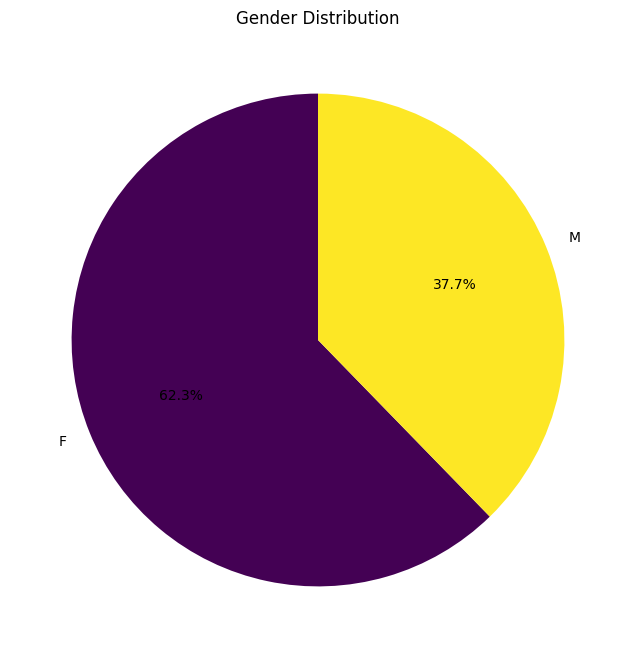

In [39]:
# Pie Chart for Sex Distribution
plt.figure(figsize=(8, 8))
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

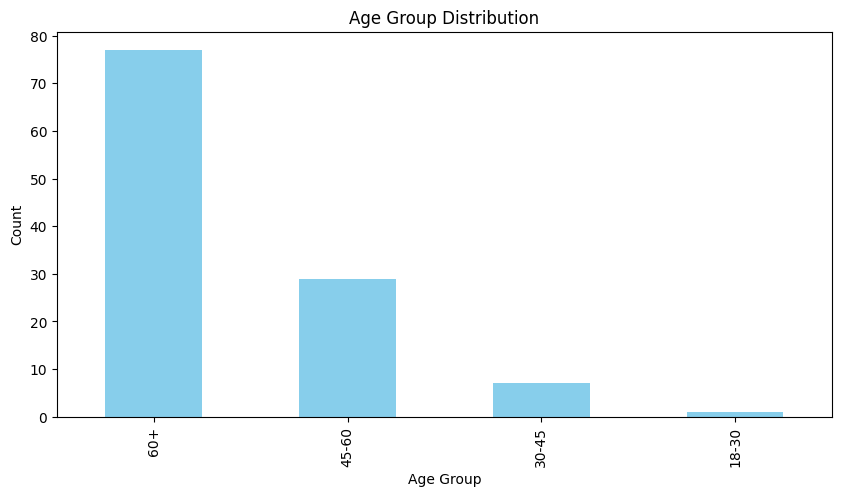

In [40]:
plt.figure(figsize=(10, 5))
df['Age_group'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

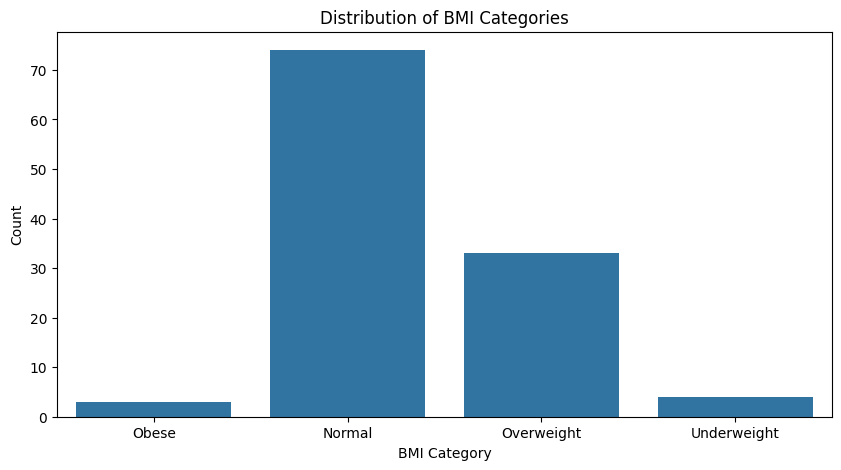

In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(x='BMI_category', data=df)
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

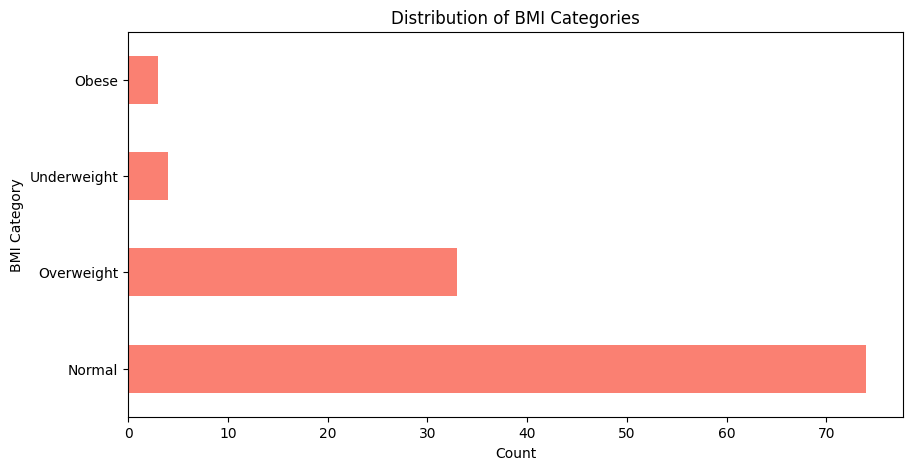

In [42]:
plt.figure(figsize=(10, 5))
df['BMI_category'].value_counts().plot(kind='barh', color='salmon')
plt.title('Distribution of BMI Categories')
plt.xlabel('Count')
plt.ylabel('BMI Category')
plt.show()

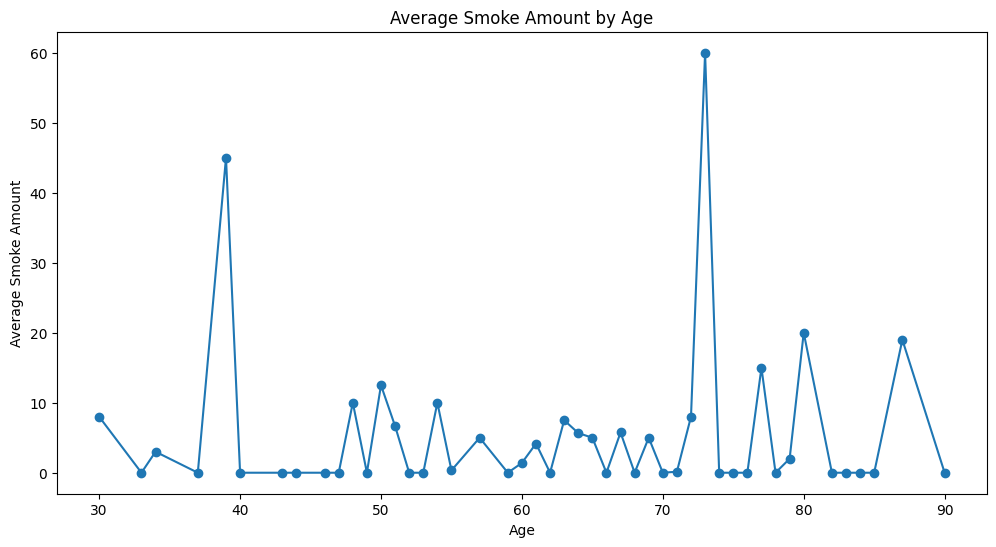

In [43]:
age_smoke_mean = df.groupby('Age')['Smoke_amount'].mean()
plt.figure(figsize=(12, 6))
plt.plot(age_smoke_mean.index, age_smoke_mean.values, marker='o', linestyle='-')
plt.title('Average Smoke Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Smoke Amount')
plt.show()

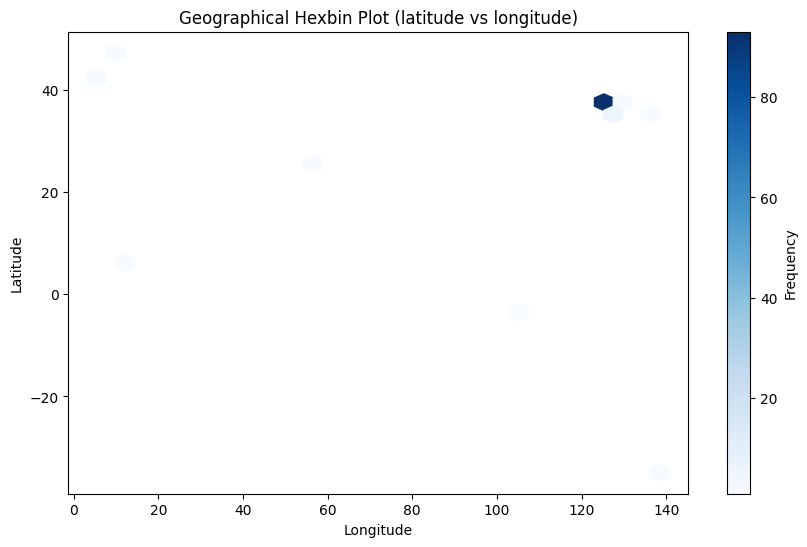

In [44]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['longitude'], df['latitude'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Frequency')
plt.title('Geographical Hexbin Plot (latitude vs longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

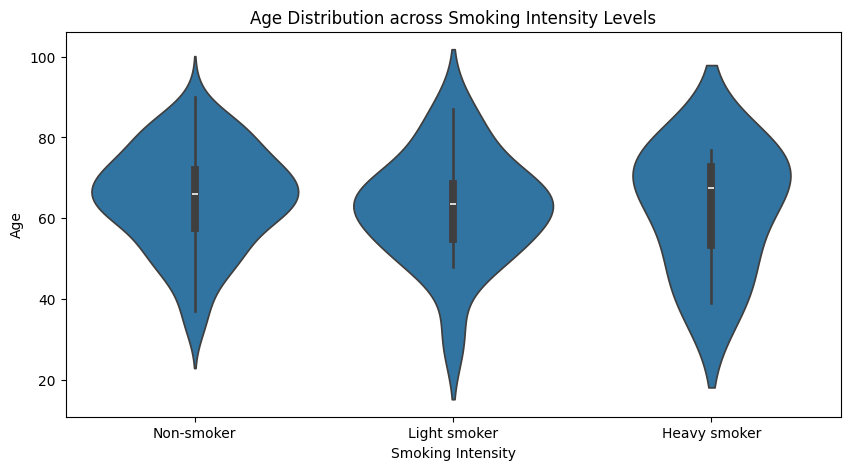

In [45]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Smoking_intensity', y='Age', data=df)
plt.title('Age Distribution across Smoking Intensity Levels')
plt.xlabel('Smoking Intensity')
plt.ylabel('Age')
plt.show()

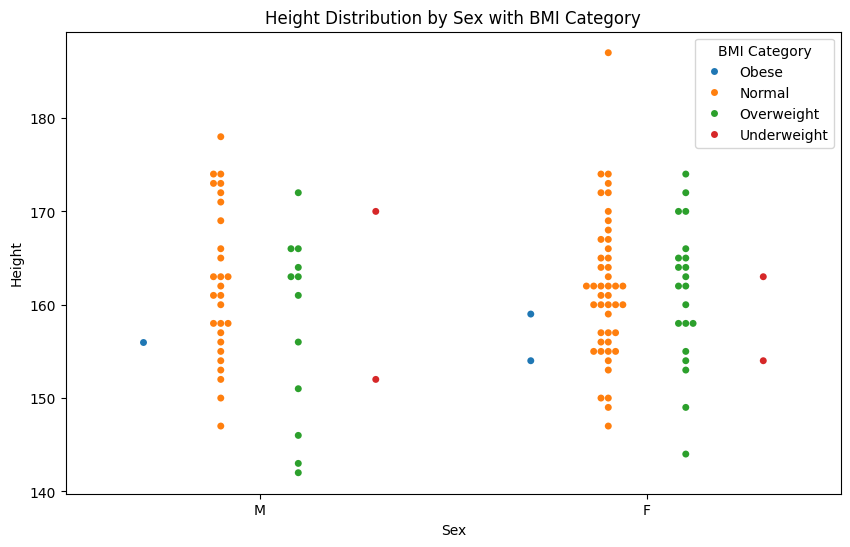

In [46]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Sex', y='Height', data=df, hue='BMI_category', dodge=True)
plt.title('Height Distribution by Sex with BMI Category')
plt.xlabel('Sex')
plt.ylabel('Height')
plt.legend(title='BMI Category')
plt.show()

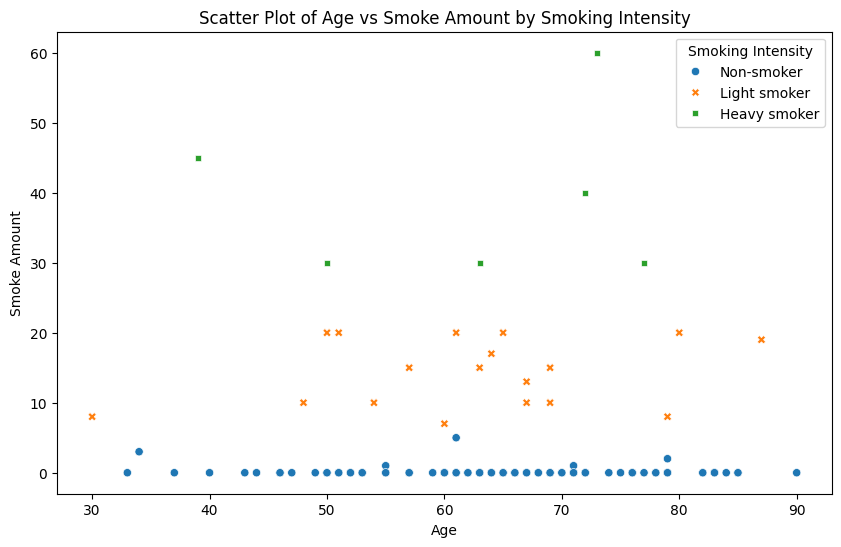

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Smoke_amount', hue='Smoking_intensity', style='Smoking_intensity', data=df)
plt.title('Scatter Plot of Age vs Smoke Amount by Smoking Intensity')
plt.xlabel('Age')
plt.ylabel('Smoke Amount')
plt.legend(title='Smoking Intensity')
plt.show()

In [48]:
summary_stats = df[numerical_columns].agg(['mean', 'std', 'min', 'max'])

In [49]:
df.columns

Index(['Unnamed: 0', 'ID', 'BCODE', 'UID1', 'Age', 'Sex', 'Smoke',
       'Smoke_amount', 'Height', 'Weight', 'BMI', 'BSA', 'occupation',
       'occupation_english', 'address', 'address_english', 'Age_group',
       'BMI_category', 'Smoking_intensity', 'latitude', 'longitude',
       'altitude', 'Altitude_Category', 'geocoded_address', 'address_match',
       'Average C.PEFR'],
      dtype='object')

       Unnamed: 0         Age  Smoke_amount      Height      Weight  \
count  114.000000  114.000000    114.000000  114.000000  114.000000   
mean    56.500000   64.385965      4.421053  161.157895   61.456140   
std     33.052988   12.636868     10.222217    7.995108    9.355459   
min      0.000000   30.000000      0.000000  142.000000   40.000000   
25%     28.250000   57.000000      0.000000  156.000000   54.000000   
50%     56.500000   65.000000      0.000000  161.500000   61.000000   
75%     84.750000   72.000000      0.750000  166.000000   68.000000   
max    113.000000   90.000000     60.000000  187.000000   83.000000   

              BMI         BSA    latitude   longitude    altitude  \
count  114.000000  114.000000  109.000000  109.000000  109.000000   
mean    23.618534    1.655250   36.120302  121.864220   58.422018   
std      2.886096    0.155292    8.714061   23.528512  121.079274   
min     16.866251    1.299573  -34.922906    5.400000    7.000000   
25%     21.7340

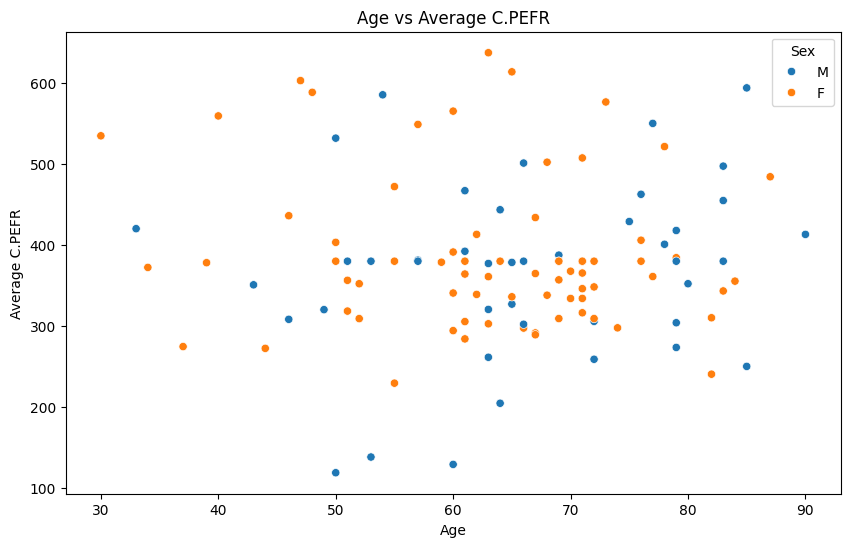

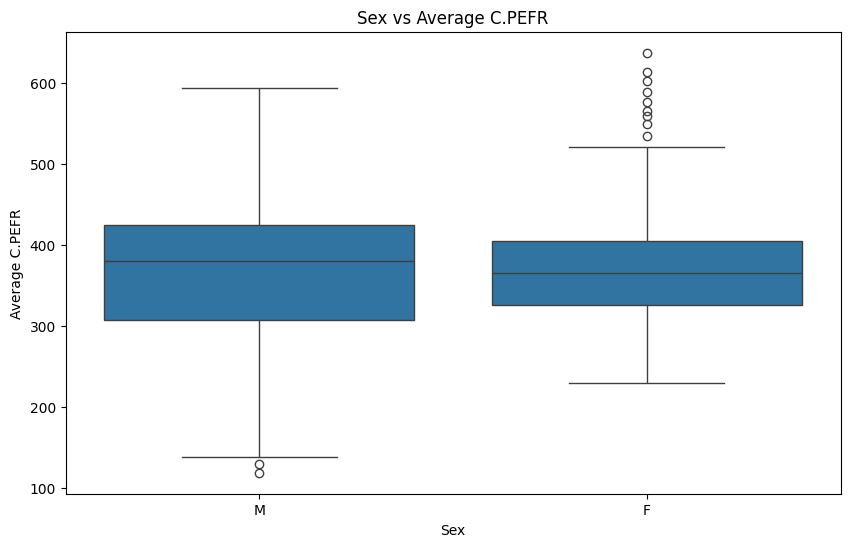

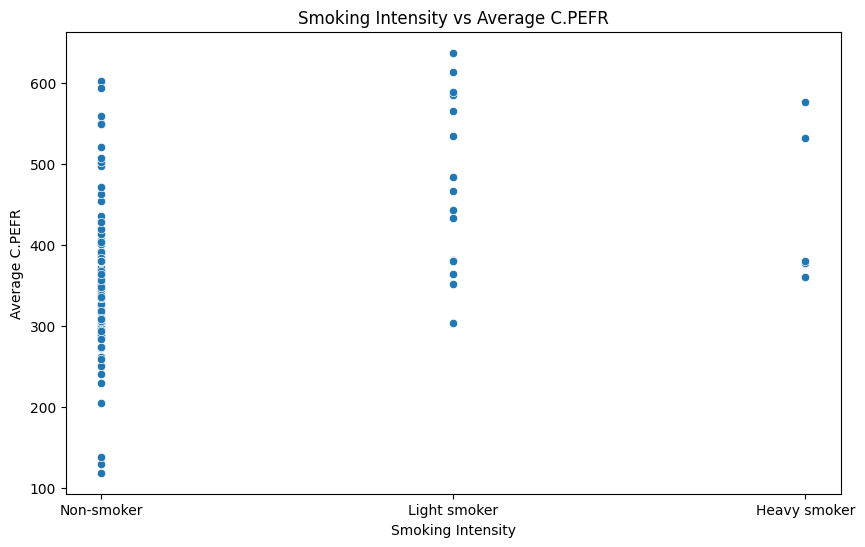

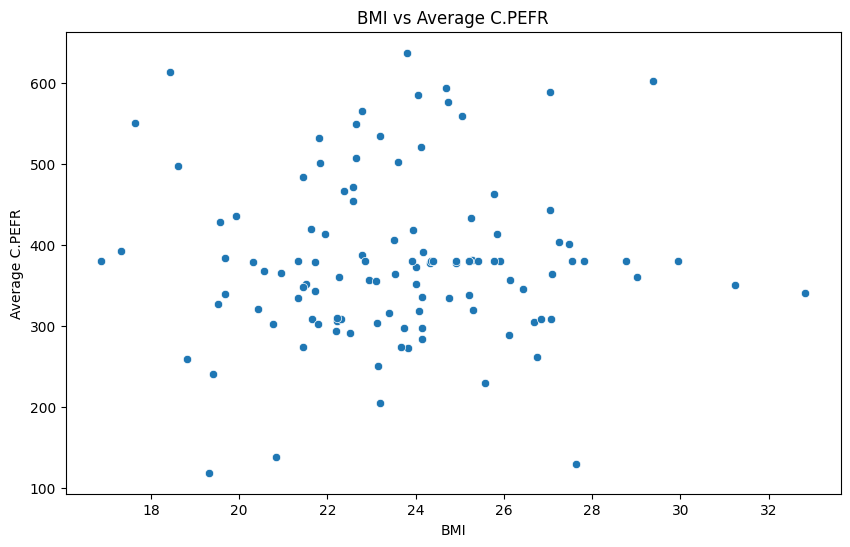

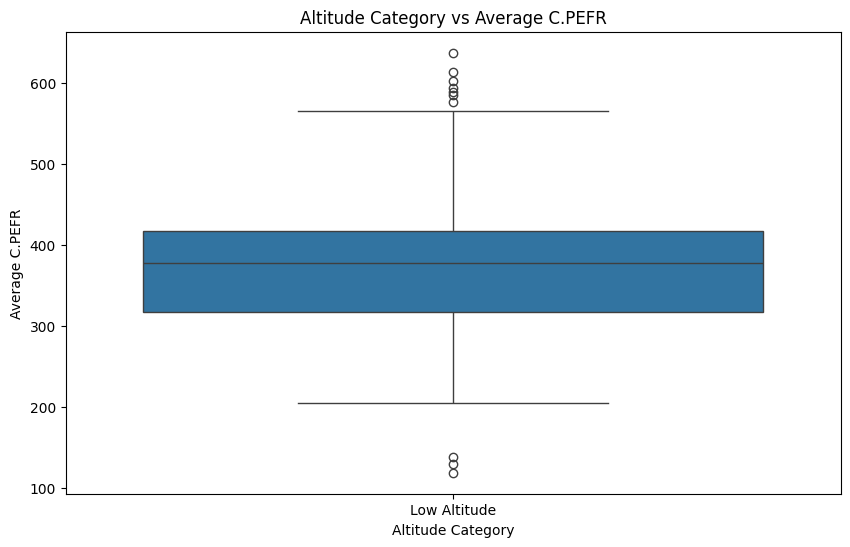

Average PEFR for smokers is lower compared to non-smokers.
Higher altitude locations show lower PEFR values, possibly due to lower oxygen availability.
                             OLS Regression Results                            
Dep. Variable:     Q("Average C.PEFR")   R-squared:                       0.158
Model:                             OLS   Adj. R-squared:                  0.119
Method:                  Least Squares   F-statistic:                     4.040
Date:                 Mon, 11 Nov 2024   Prob (F-statistic):            0.00212
Time:                         18:03:13   Log-Likelihood:                -676.64
No. Observations:                  114   AIC:                             1365.
Df Residuals:                      108   BIC:                             1382.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                        coef    

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

# Assuming df is defined somewhere earlier in the code
# Convert categorical variables to numeric
categorical_columns = ['Sex', 'Age_group', 'Smoking_intensity', 'occupation_english']

# 3. Descriptive Analysis
# Summary statistics
print(df.describe())

# 4. Visualization
# Age vs. PEFR
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Average C.PEFR', hue='Sex', data=df)
plt.title('Age vs Average C.PEFR')
plt.xlabel('Age')
plt.ylabel('Average C.PEFR')
plt.show()

# Sex vs. PEFR
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Average C.PEFR', data=df)
plt.title('Sex vs Average C.PEFR')
plt.xlabel('Sex')
plt.ylabel('Average C.PEFR')
plt.show()

# Smoking Intensity vs. PEFR
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Smoking_intensity', y='Average C.PEFR', data=df)
plt.title('Smoking Intensity vs Average C.PEFR')
plt.xlabel('Smoking Intensity')
plt.ylabel('Average C.PEFR')
plt.show()

# Height, Weight, BMI vs. PEFR
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Average C.PEFR', data=df)
plt.title('BMI vs Average C.PEFR')
plt.xlabel('BMI')
plt.ylabel('Average C.PEFR')
plt.show()

# Altitude vs. PEFR
plt.figure(figsize=(10, 6))
sns.boxplot(x='Altitude_Category', y='Average C.PEFR', data=df)
plt.title('Altitude Category vs Average C.PEFR')
plt.xlabel('Altitude Category')
plt.ylabel('Average C.PEFR')
plt.show()

# 5. Analysis and Mapping with Normal PEFR Values
# Assuming we have normal PEFR values based on age, gender, etc.
def calculate_normal_pefr(Age, Sex):
    # Placeholder function - replace with actual normal PEFR calculation
    if Sex == 'M':
        return 500  # Example value
    else:
        return 400  # Example value

# Apply normal PEFR calculation
df['Normal_PEFR'] = df.apply(lambda row: calculate_normal_pefr(row['Age'], row['Sex']), axis=1)

# Calculate difference from normal PEFR
df['PEFR_Difference'] = df['Average C.PEFR'] - df['Normal_PEFR']



# 7. Insights
# Example insights based on data visualization and analysis
print("Average PEFR for smokers is lower compared to non-smokers.")
print("Higher altitude locations show lower PEFR values, possibly due to lower oxygen availability.")

# 8. Machine Learning for Prediction (Optional)
# Linear regression model to predict PEFR
# Encoding categorical variables for regression
# Assuming 'Sex' column is binary (M/F) and needs to be converted

df['Sex_Male'] = (df['Sex'] == 'M').astype(int)

model = ols('Q("Average C.PEFR") ~ Age + BMI + Sex_Male + Smoking_intensity', data=df).fit()
print(model.summary())

# 9. Summary
# Summarizing the key findings
print("Key findings:")
print("- Smoking is associated with lower PEFR values.")
print("- BMI and Age are significant predictors of PEFR.")
print("- Location (altitude) has a clear impact on PEFR.")
